/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=50, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 18us/step - loss: 2.3019 - val_loss: 2.3007
Epoch 2/50
54000/54000 [==============================] - 1s 14us/step - loss: 2.3002 - val_loss: 2.2989
Epoch 3/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2983 - val_loss: 2.2965
Epoch 4/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2959 - val_loss: 2.2935
Epoch 5/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2927 - val_loss: 2.2893
Epoch 6/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2881 - val_loss: 2.2832
Epoch 7/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2812 - val_loss: 2.2736
Epoch 8/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2698 - val_loss: 2.2576
Epoch 9/50
54000/54000 [==============================] - 1s 15us/step - loss: 2.2500 - val_loss: 2.2293
Epoch 

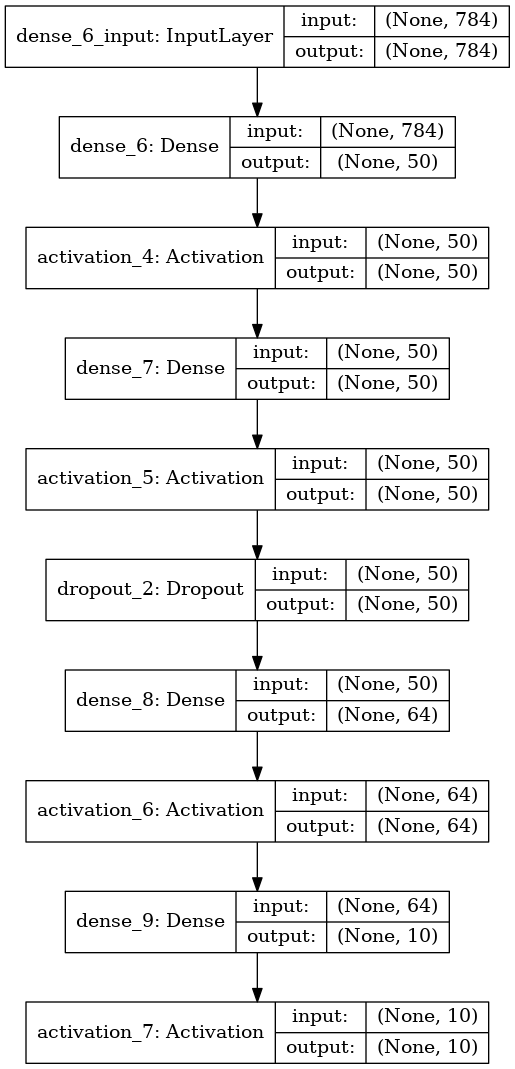

In [5]:
#!pip install pydot
#!pip install graphviz 
#!apt-get install graphviz

#We'll use Sequential model, dense layer and Stochastic Gradient Descent as optimizing algorithm

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

#Mnist DataSet made of 28x28 images

from keras.datasets import mnist

# download dataset and put them in variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

# create "EMPTY" sequential model object
model = Sequential()

# Added model a Dense Layer
# Dense Layer means Fully Connected Layer
# FLC: Every input node is connected with every output node 
#  and every connection has own weights
# init is initiliazer values of weights (http://keras.io/initializations/)

model.add(Dense(input_dim=x_train.shape[1],
               output_dim = 50, init='uniform'))
model.add(Activation('tanh'))

'''
model.add(Dense(input_dim=x_train.shape[1],
               output_dim = 50,
               init = 'uniform',
               activation = 'tanh'))
'''
# Activation Funcs make our model non-linear
# It works at Layer Output
# Some activation funcs: 
#         tanh(hiperbolik tanjant),
#         ReLu(Rectified Linear Unit)

# Let's add a few layer to the model

from keras.layers.core import Activation
from keras.layers.core import Dropout

model.add(Dense(50, init='uniform'))  # output and init
model.add(Activation('tanh'))
model.add(Dropout(0.5))               # to prevent overfitting
model.add(Dense(64, init='uniform'))
model.add(Activation('relu'))

# There are 64 values at output but we need just 10 values.
# One-hot encoding(OHE): Each a bit represents an integer and just one bit is active.
# One-cold encoding: inverse of OHE

model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

# Turn y_train to OHE format

from keras.utils.np_utils import to_categorical
y_train_ohe = to_categorical(y_train)

# Our model is done. But we need to train it
# We need a optimization algorithm to train it
# We'll use Stochastic Gradient Descent(SGD)

# lr means learning rate
# decay parameter is reducing learning rate
# In the momentum method, we keep a speed vector and we update it on everystep.
# nesterov makes momentum method intelligent. 
# If our step would be big, it'll fix it.

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Finally, we can compile our model.
# categorical_crossentropy (aka multiclass logloss) is a loss function.
# It is used with softmax function.

model.compile(loss='categorical_crossentropy', optimizer=sgd)

# give data to model.

model.fit(x_train, y_train_ohe,
         nb_epoch=50, batch_size=500,   # repeat all the dataset 50 times(called 50 epoch)

# There are 60k example on x_train. We seperate ten percent(600) of them as validation split
# 90% of data to train, 10% of data testing and validation
# We'll get more spesific info with Verbose.
          
         validation_split=0.1, verbose=1)

# We trained our model. We'll predict on test examples.

y_test_predictions = model.predict_classes(x_test, verbose=1)

# Let's see our results

import numpy as np
correct = np.sum(y_test_predictions == y_test)
print('Test Accuracy: ', correct/float(y_test.shape[0])*100.0, '%')

#If you want to see your model with Graphviz

from keras.utils.vis_utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True)
Image("model.png")





